In [1]:
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datum = np.loadtxt("park_time.csv",delimiter=",",usecols=range(1,11))

In [3]:
datum

array([[   0.,   70.,   60.,   90.,   70.,   60.,   80.,  100.,  110.,
          80.],
       [  70.,    0.,   60.,   80.,   50.,   40.,   20.,   70.,   80.,
          60.],
       [  60.,   60.,    0.,   70.,   50.,   40.,   70.,   80.,   90.,
          90.],
       [  90.,   80.,   70.,    0.,   50.,   60.,   70.,   70.,   80.,
         100.],
       [  70.,   50.,   50.,   50.,    0.,   40.,   50.,   40.,   40.,
          60.],
       [  60.,   40.,   40.,   60.,   40.,    0.,   40.,   70.,   80.,
          60.],
       [  80.,   20.,   70.,   70.,   50.,   40.,    0.,   70.,   80.,
          60.],
       [ 100.,   70.,   80.,   70.,   40.,   70.,   70.,    0.,   40.,
          90.],
       [ 110.,   80.,   90.,   80.,   40.,   80.,   80.,   40.,    0.,
         100.],
       [  80.,   60.,   90.,  100.,   60.,   60.,   60.,   90.,  100.,
           0.]])

In [4]:
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)

In [5]:
pos = mds.fit_transform(datum)

In [6]:
pos

array([[ -1.02823007, -64.28599723],
       [ 23.77000051, -10.17421639],
       [-31.85280781, -31.66110601],
       [-54.09881243,  10.50741014],
       [ -7.8779374 ,  15.29415345],
       [ -3.32424227, -17.3459525 ],
       [ 27.59045382,   3.68202695],
       [-16.08682522,  47.2559179 ],
       [  2.50497688,  62.30291613],
       [ 60.40342398, -15.57515243]])

In [7]:
labels = np.genfromtxt("park_time.csv",delimiter=",",usecols=0,dtype=str)

In [8]:
labels

array(['minamoto', 'kasairinkai', 'toneri', 'hikarigaoka', 'yoyogi',
       'ueno', 'yumenoshima', 'komazawa', 'kinuta', 'shinozaki'], 
      dtype='|S11')

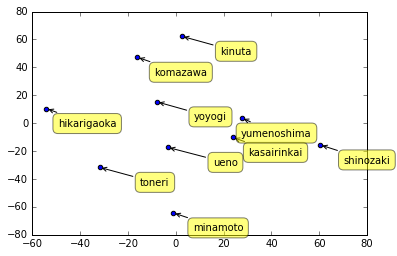

In [9]:
plt.scatter(pos[:, 0], pos[:, 1], marker = 'o')

for label, x, y in zip(labels, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (70, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )

plt.show()

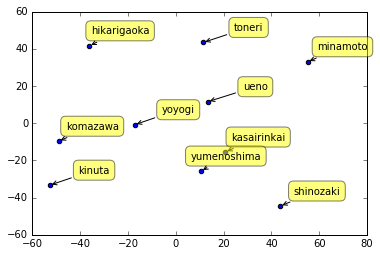

In [10]:
plt.figure()

angle = 120.
theta = (angle/180.) * np.pi

rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                         [np.sin(theta),  np.cos(theta)]])
revMatrix = np.array([[-1, 0], [0, 1]])

fixed_pos = rotMatrix.dot(revMatrix.dot(pos.T)).T
plt.scatter(fixed_pos[:, 0], fixed_pos[:, 1], marker = 'o')

for label, x, y in zip(labels, fixed_pos[:, 0], fixed_pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (60, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )

plt.show()